In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [318]:
train_data=pd.read_csv('Housetrain.csv')

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [319]:
train_data.shape

(1460, 81)

In [320]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [321]:
train_data.drop('Id',axis=1,inplace=True)

Finding NUll Values percentage in every column

In [322]:
t=len(train_data)
NULL_v=train_data.isnull().sum()
for col,values in NULL_v.items():
    print(col," : ",(values/t)*100,"%")

MSSubClass  :  0.0 %
MSZoning  :  0.0 %
LotFrontage  :  17.73972602739726 %
LotArea  :  0.0 %
Street  :  0.0 %
Alley  :  93.76712328767123 %
LotShape  :  0.0 %
LandContour  :  0.0 %
Utilities  :  0.0 %
LotConfig  :  0.0 %
LandSlope  :  0.0 %
Neighborhood  :  0.0 %
Condition1  :  0.0 %
Condition2  :  0.0 %
BldgType  :  0.0 %
HouseStyle  :  0.0 %
OverallQual  :  0.0 %
OverallCond  :  0.0 %
YearBuilt  :  0.0 %
YearRemodAdd  :  0.0 %
RoofStyle  :  0.0 %
RoofMatl  :  0.0 %
Exterior1st  :  0.0 %
Exterior2nd  :  0.0 %
MasVnrType  :  0.547945205479452 %
MasVnrArea  :  0.547945205479452 %
ExterQual  :  0.0 %
ExterCond  :  0.0 %
Foundation  :  0.0 %
BsmtQual  :  2.5342465753424657 %
BsmtCond  :  2.5342465753424657 %
BsmtExposure  :  2.6027397260273974 %
BsmtFinType1  :  2.5342465753424657 %
BsmtFinSF1  :  0.0 %
BsmtFinType2  :  2.6027397260273974 %
BsmtFinSF2  :  0.0 %
BsmtUnfSF  :  0.0 %
TotalBsmtSF  :  0.0 %
Heating  :  0.0 %
HeatingQC  :  0.0 %
CentralAir  :  0.0 %
Electrical  :  0.0684931506

Features which we will be deleting -More than 45% values are null


1)Alley


2)MasVnrType


3)MasVnrArea


4)PoolQC


5)Fence


6)MiscFeature


7)FireplaceQu

In [323]:
train_data.drop(['Alley','MasVnrType','MasVnrArea','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

In [324]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [325]:
train_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [326]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [327]:
#To check-Number of duplicate rows
duplicate_count = train_data.duplicated().sum()
print(duplicate_count) 

0


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

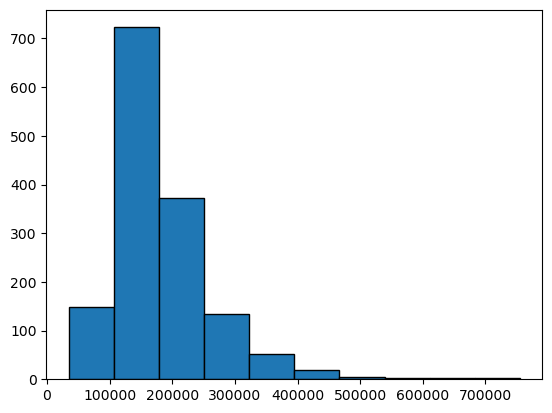

In [328]:
plt.hist(train_data['SalePrice'],edgecolor='black')

In [329]:
# Plot data distribution for each numeric column
numeric_features = train_data.select_dtypes(include=['int64', 'float64'])

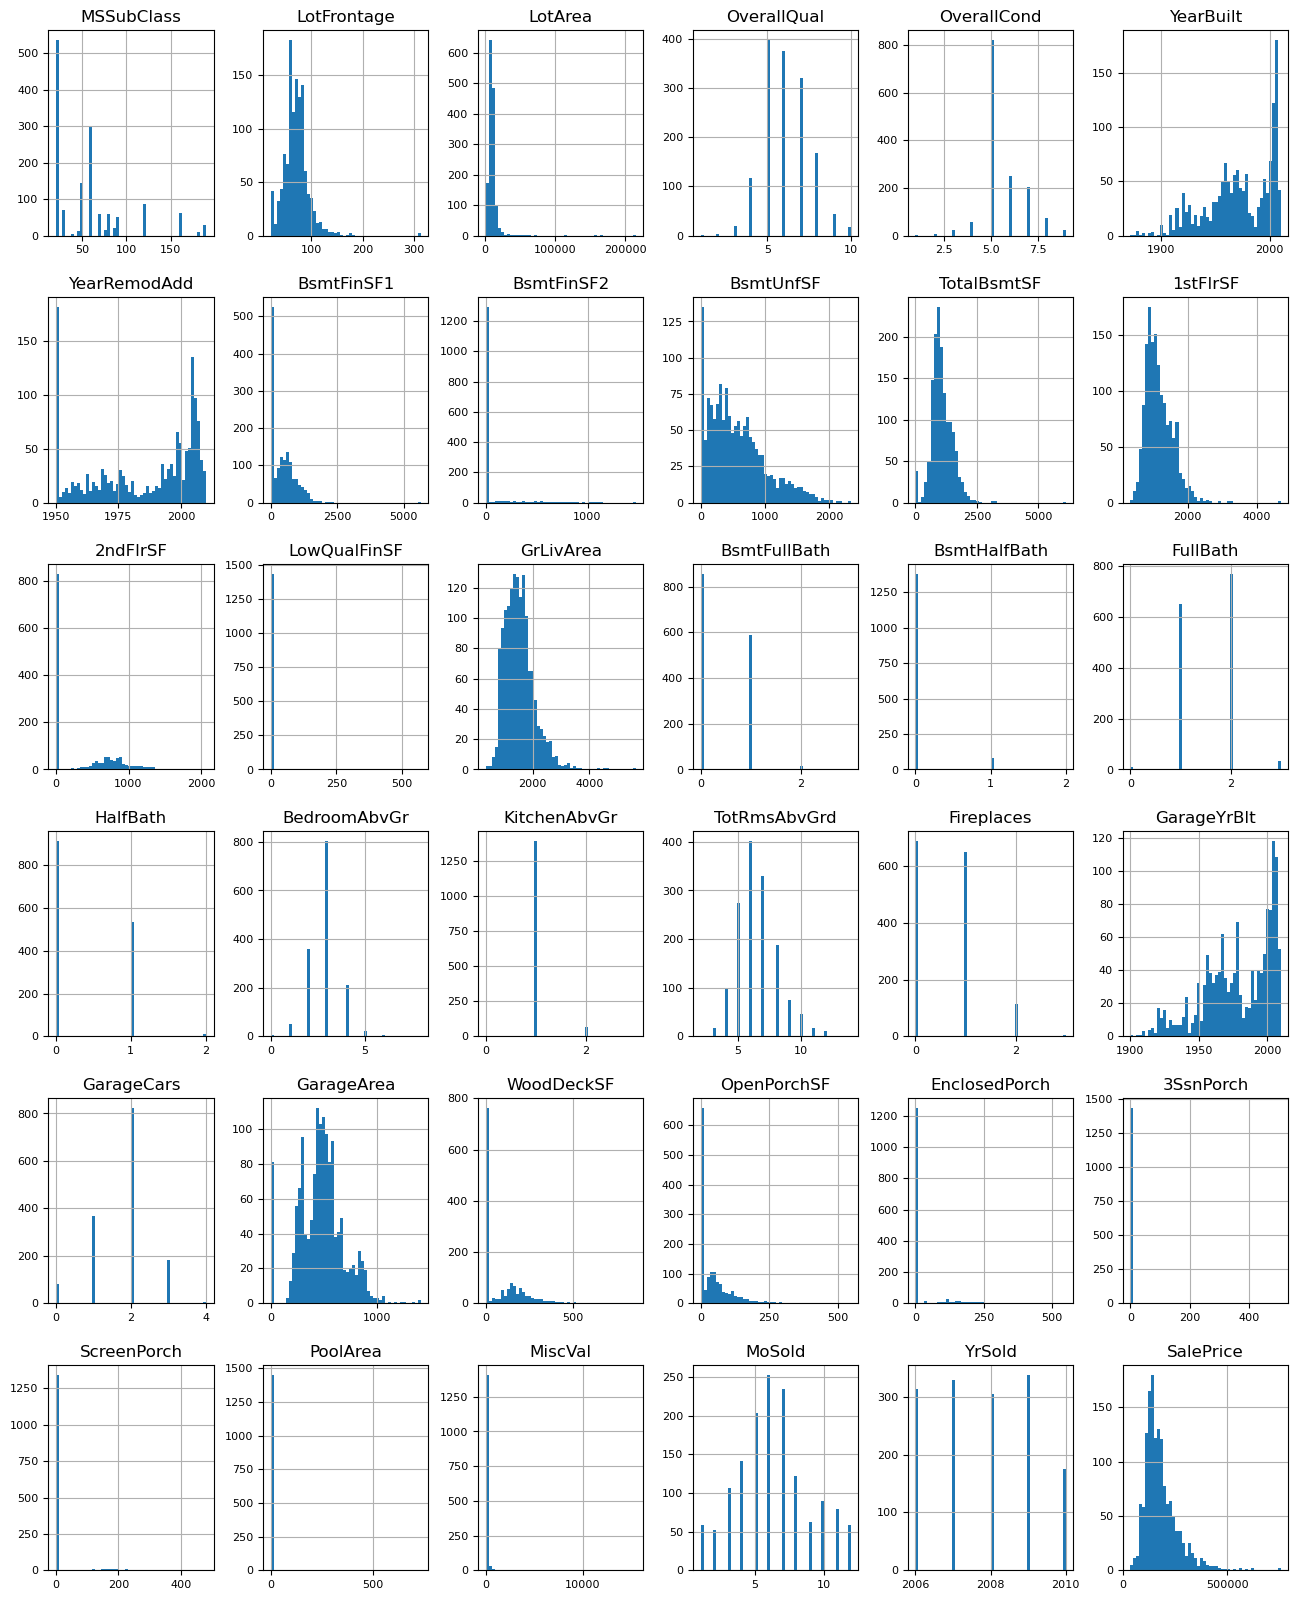

In [330]:
numeric_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

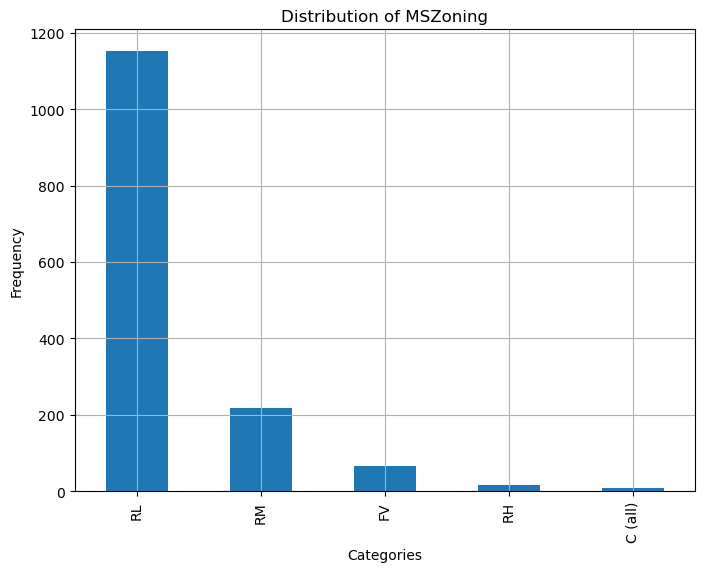

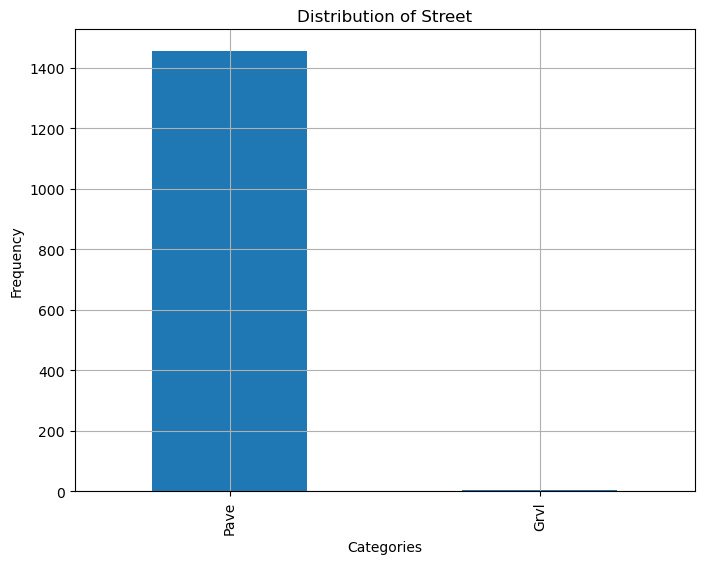

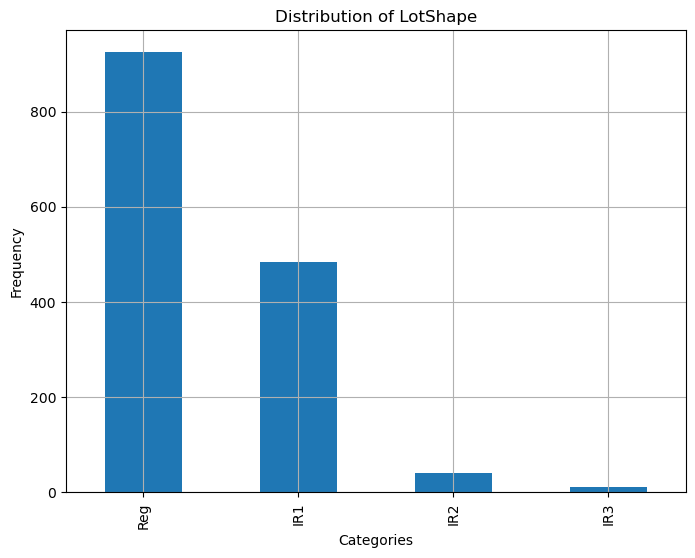

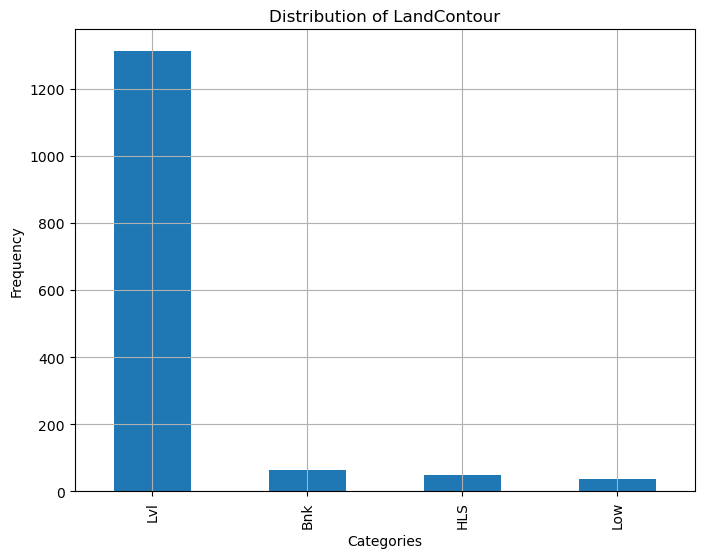

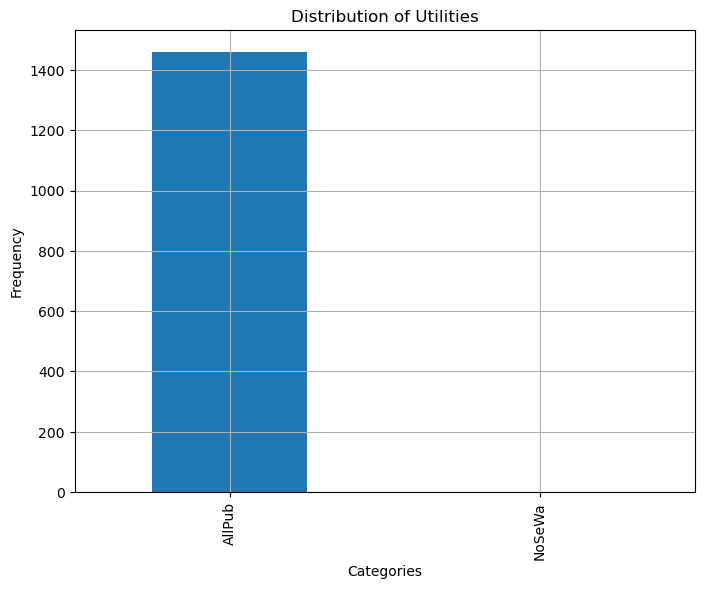

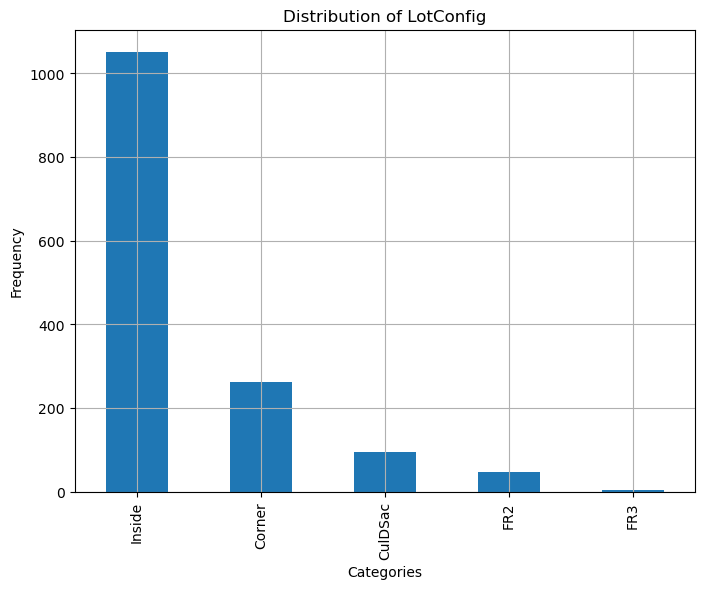

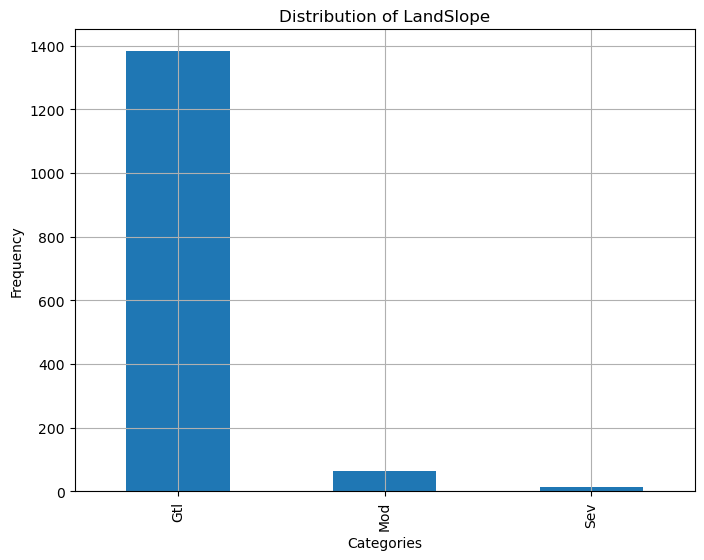

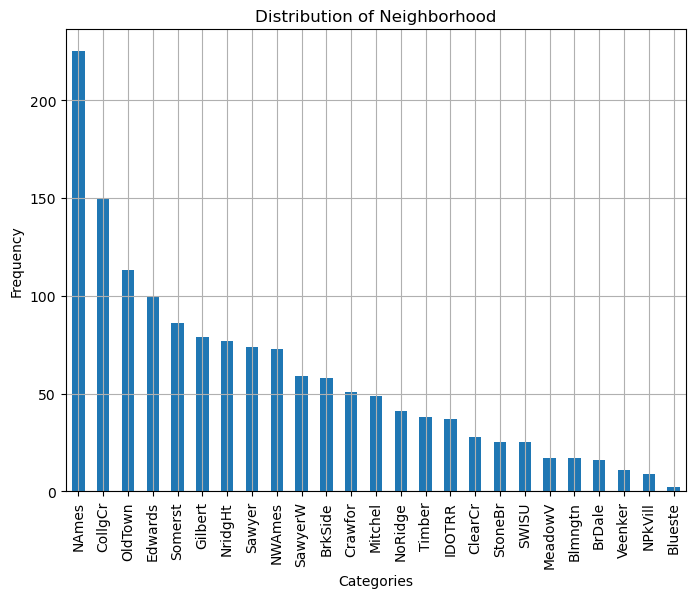

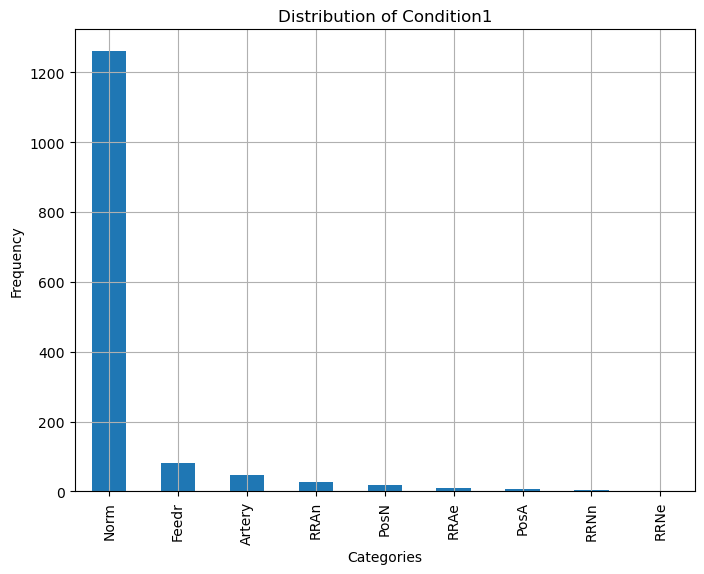

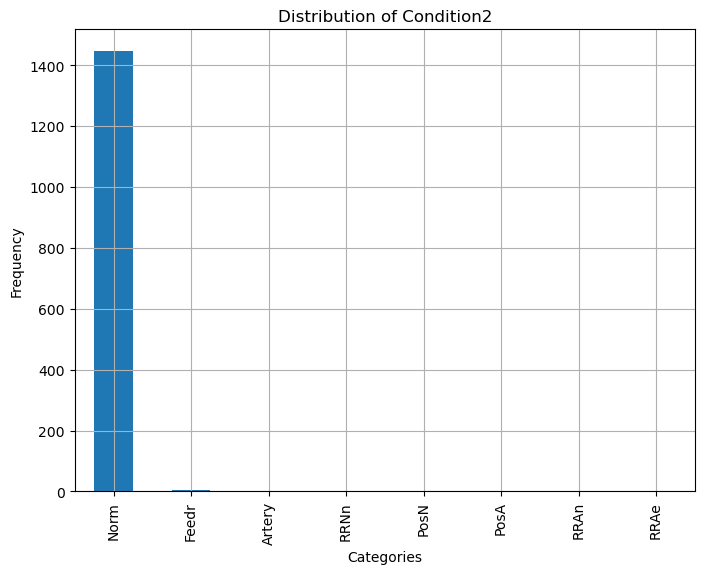

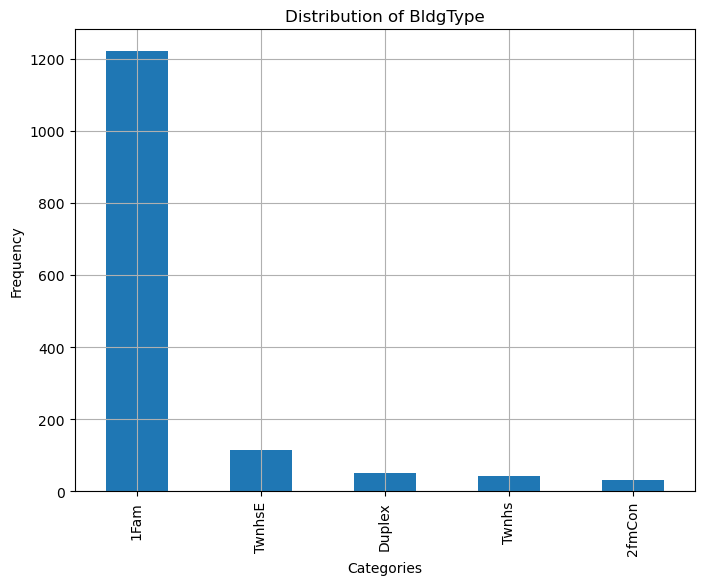

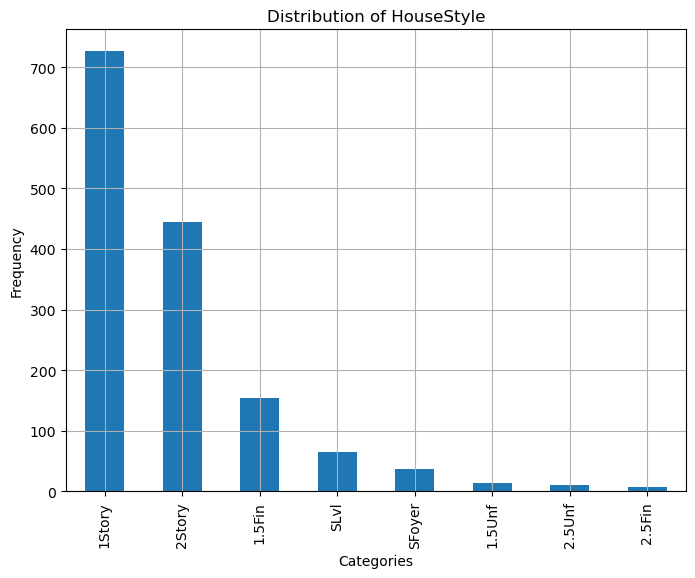

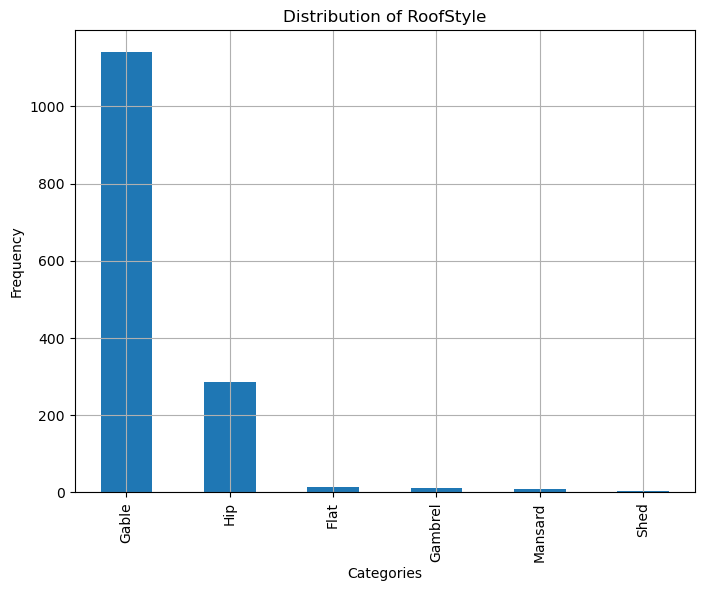

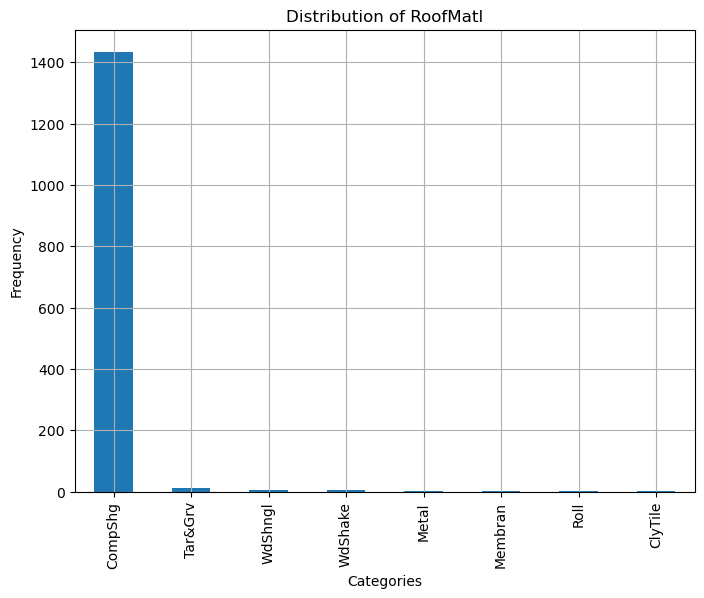

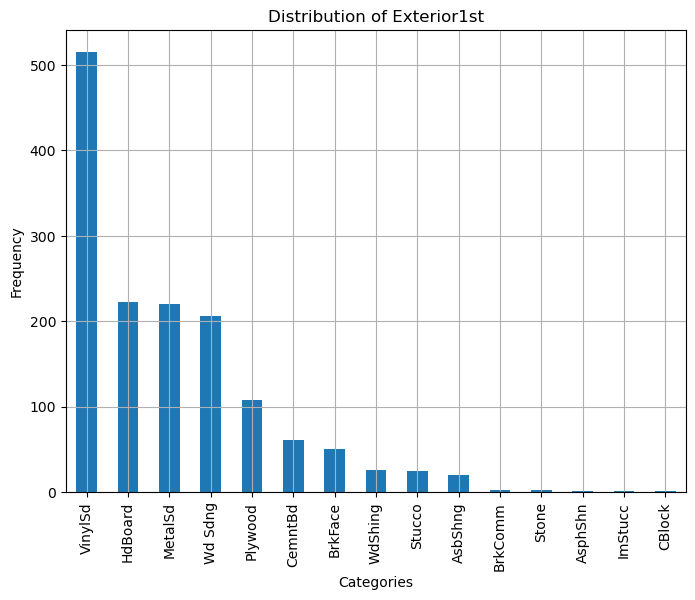

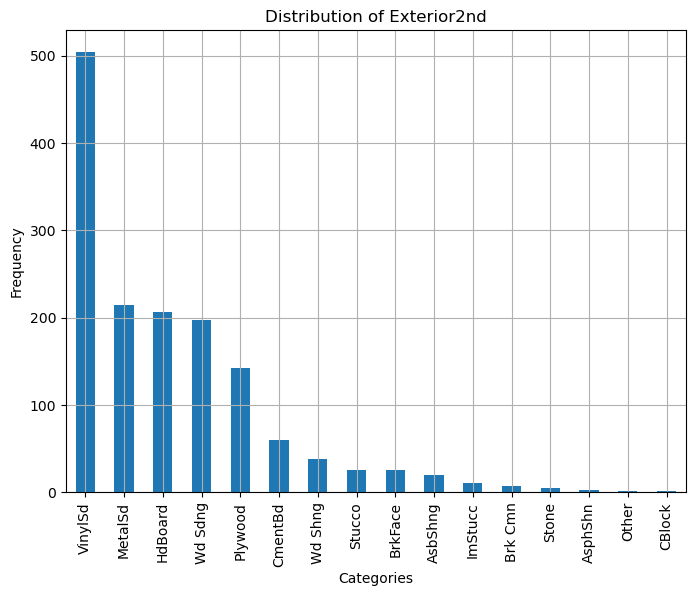

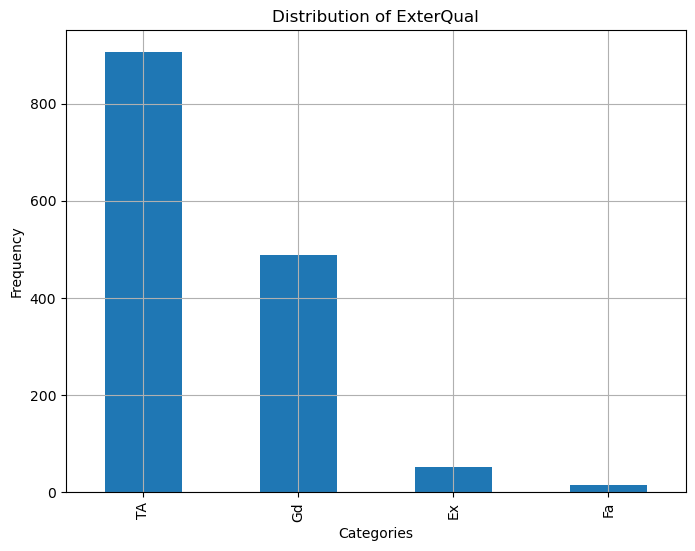

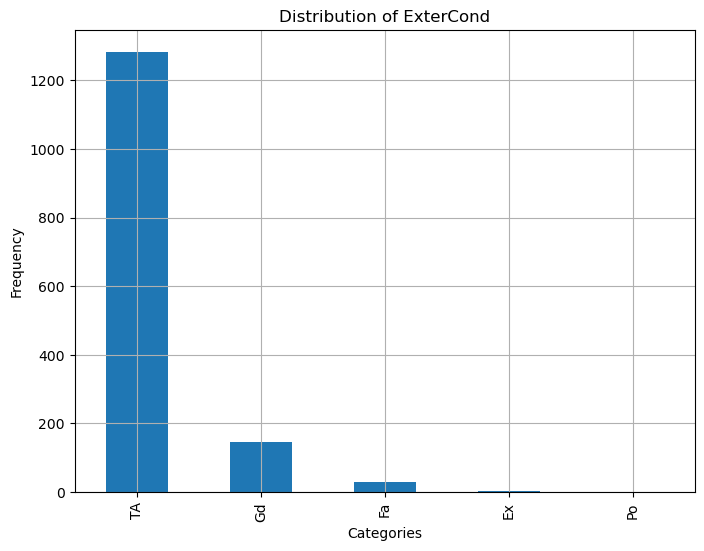

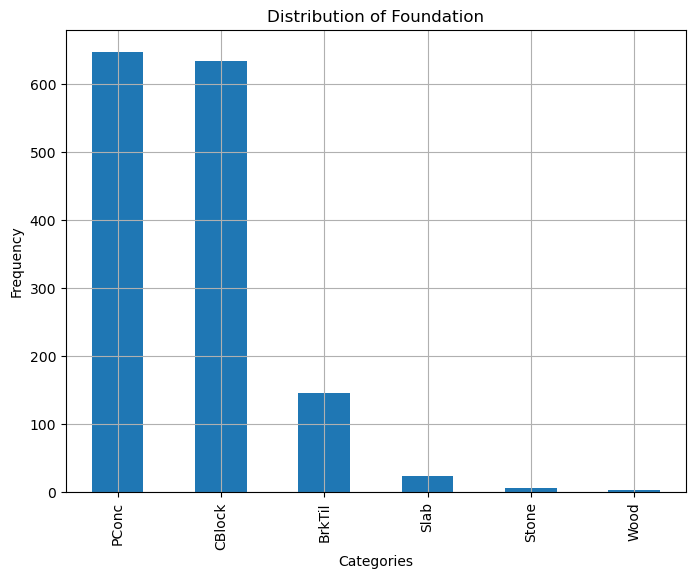

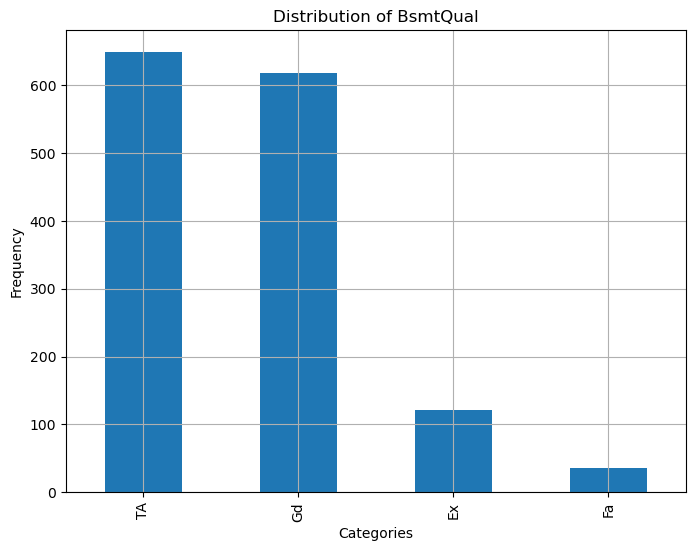

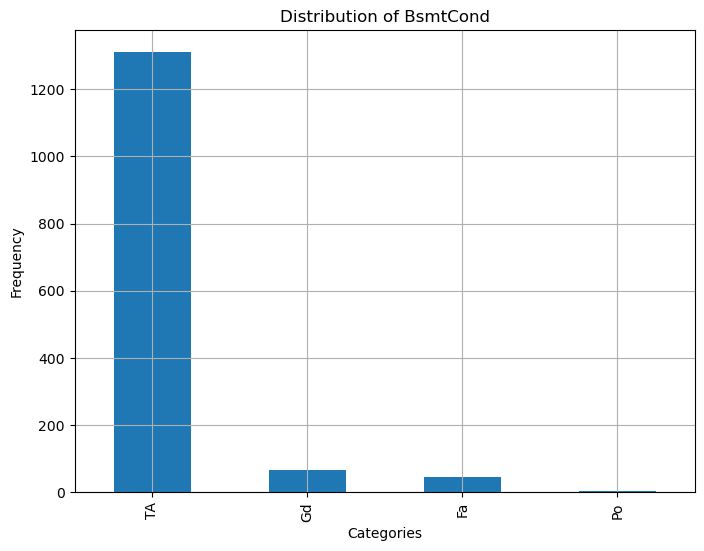

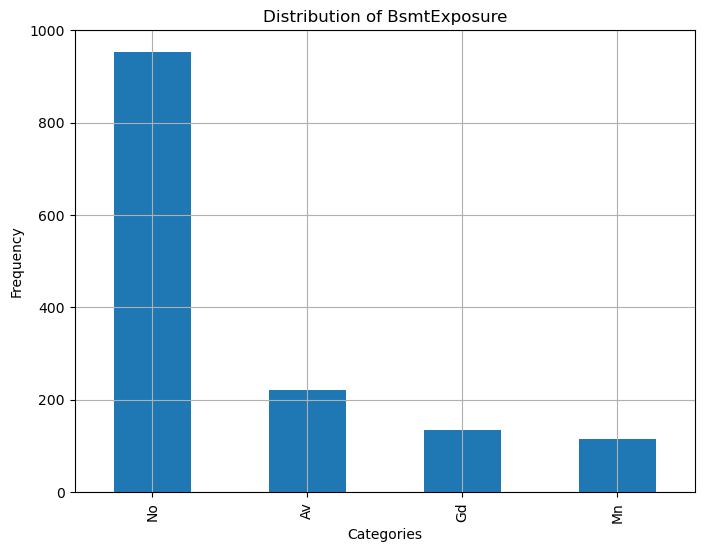

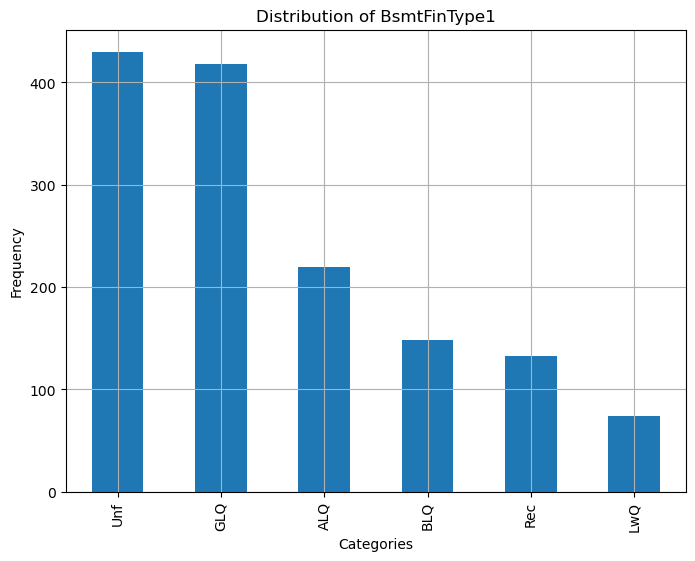

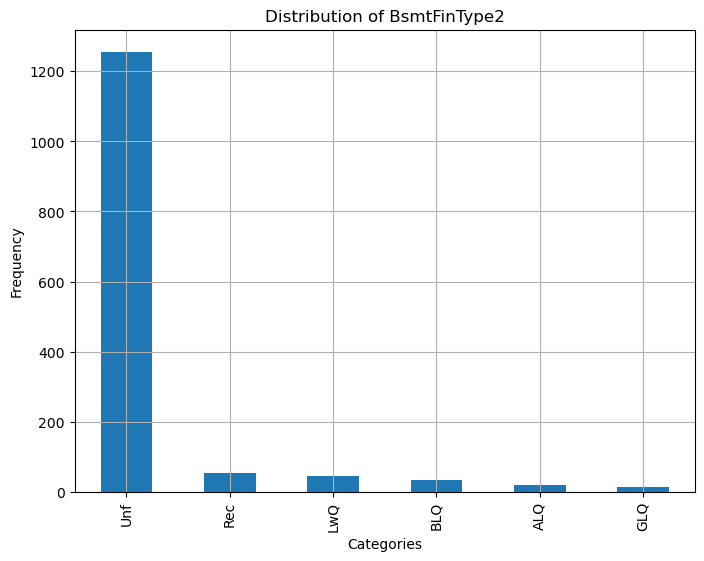

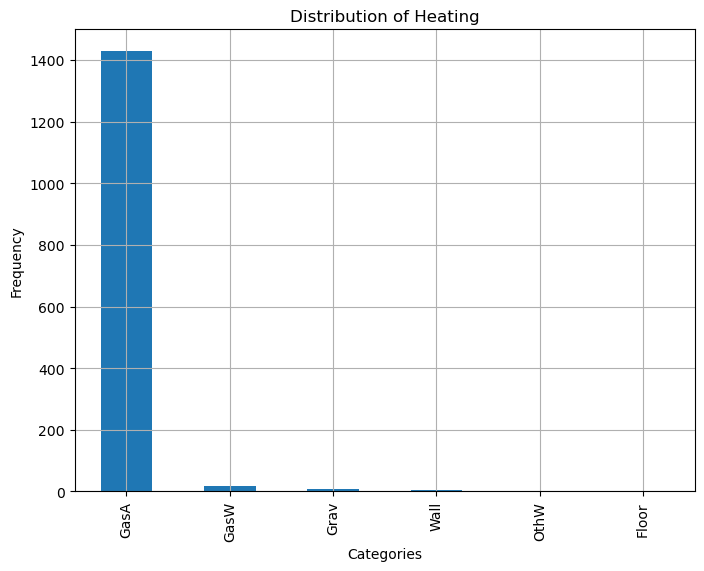

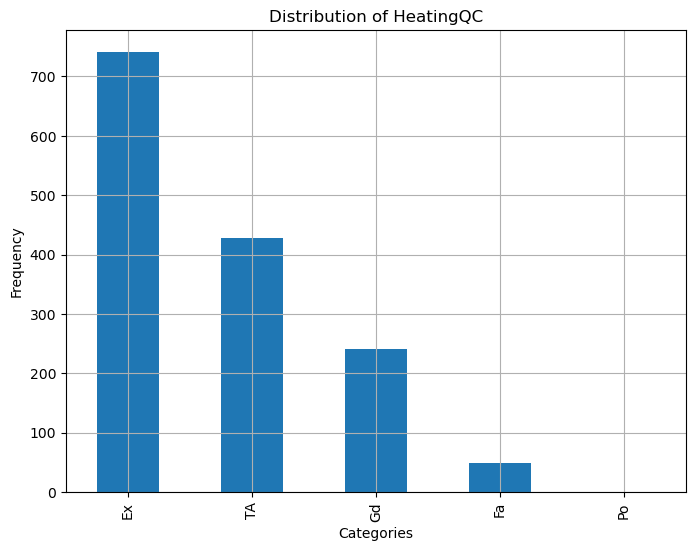

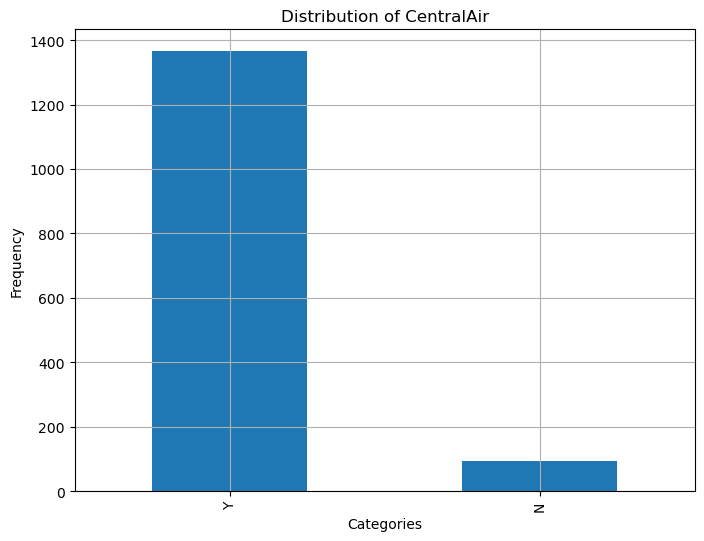

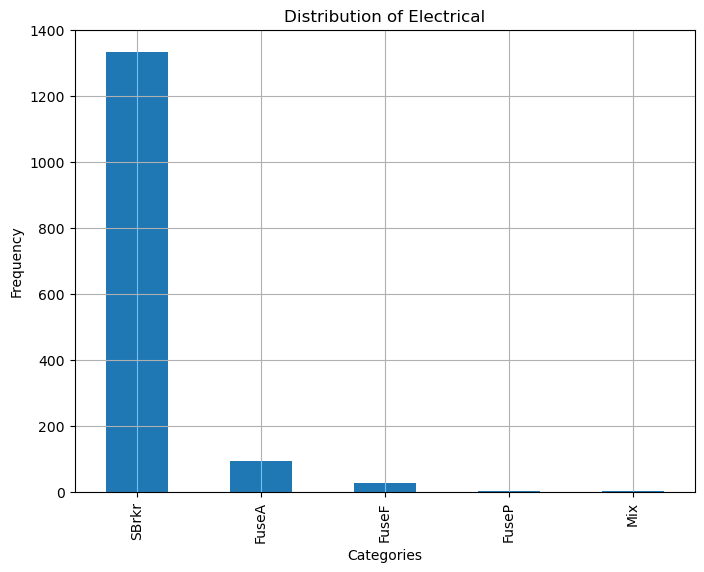

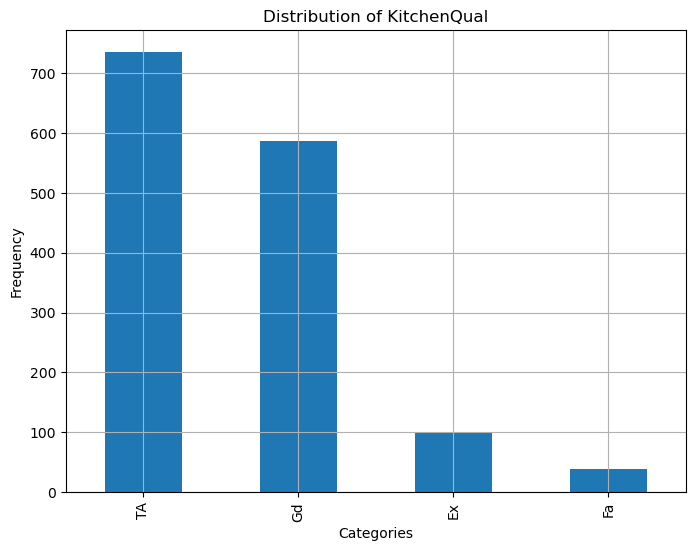

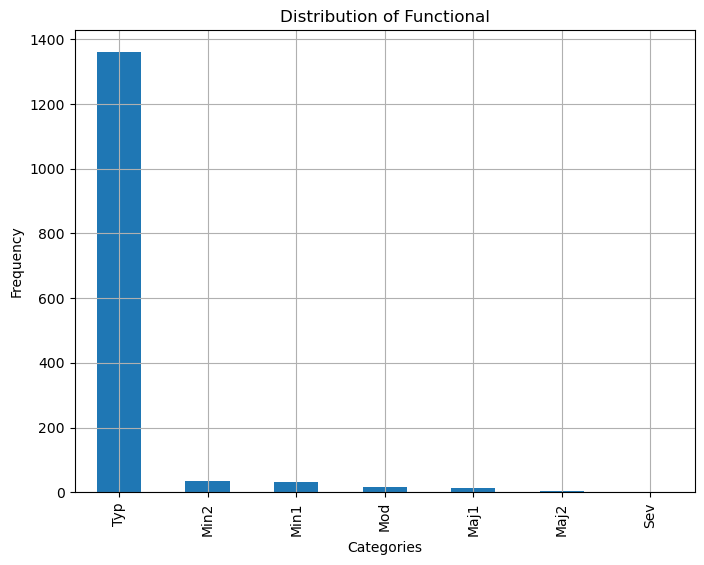

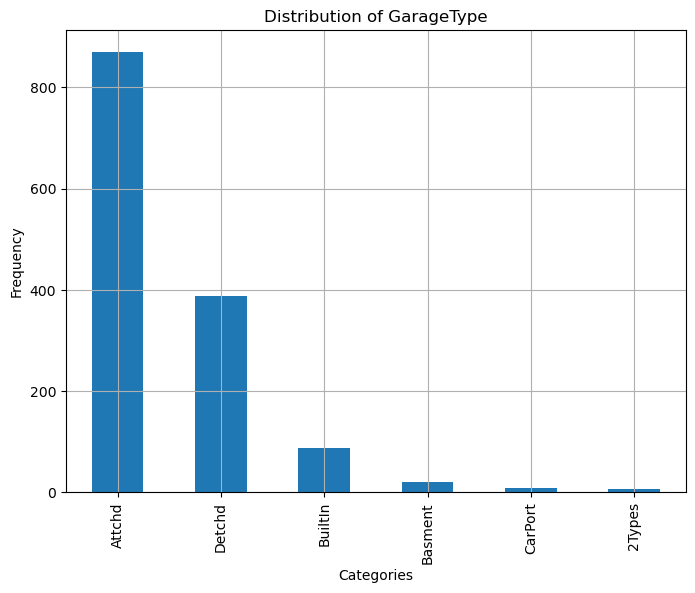

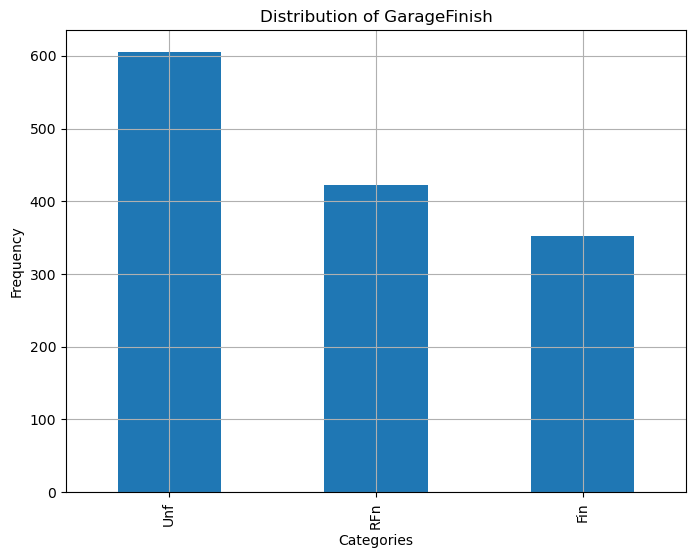

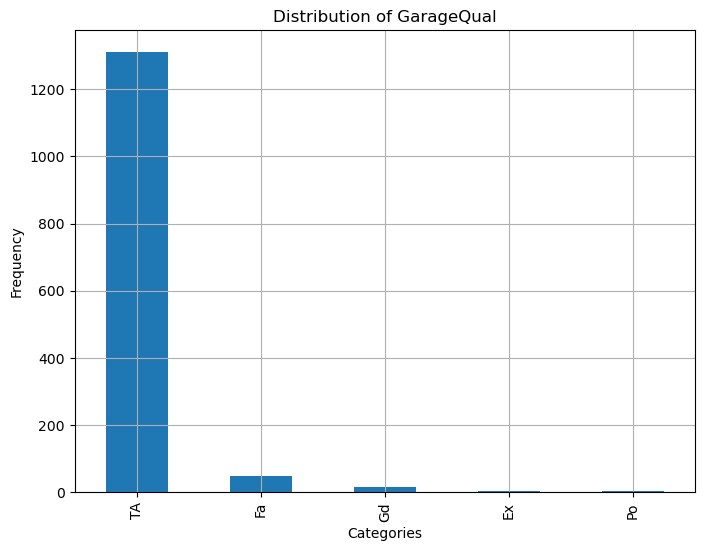

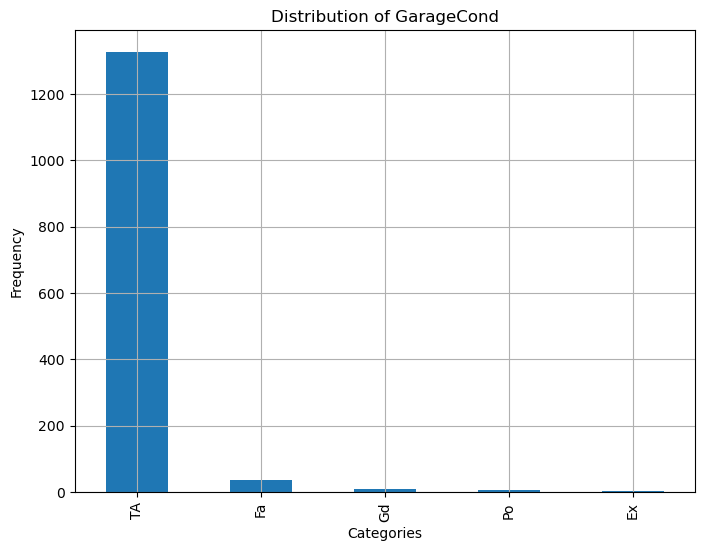

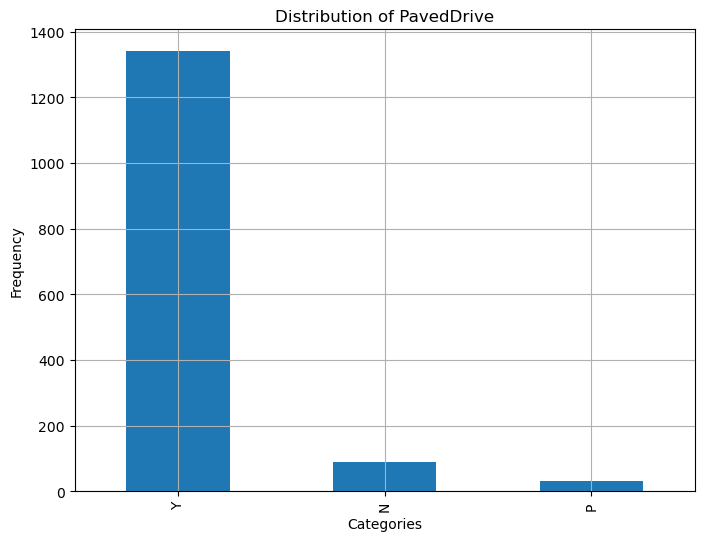

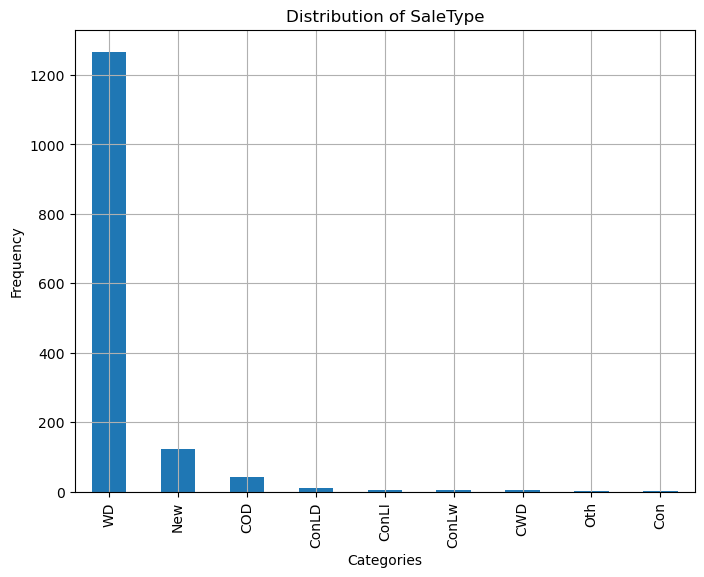

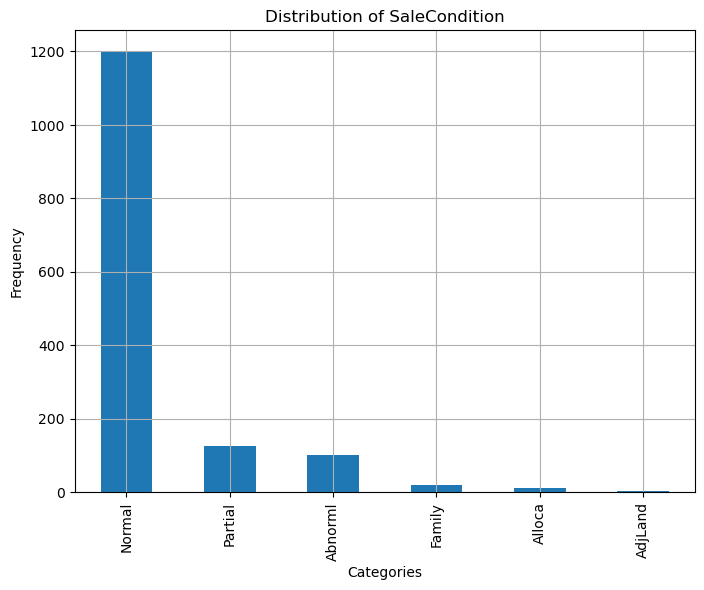

In [331]:
#Checking distibution for non-numerical datasets
object_features = train_data.select_dtypes(include=['object'])
for column in object_features.columns:
    plt.figure(figsize=(8, 6))
    object_features[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [332]:
object_features.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


Changing All the object feature-USing Label Encoder

In [333]:

from sklearn.preprocessing import LabelEncoder
val=object_features.dtypes
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
for c,v in val.items():
    train_data[c]=label_encoder.fit_transform(train_data[c])




In [334]:

train_data.select_dtypes(include=['object']).shape[1]


0

Checking if any Null values present -If present then filling it with mean 

In [335]:
val=train_data.isnull().sum()
print("Column with NULL Values Are:\n")
for v,c in val.items():
    if c>0:
        print(v," -> ",val[v])

Column with NULL Values Are:

LotFrontage  ->  259
GarageYrBlt  ->  81


In [336]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
for v,c in val.items():
    # Extract the column with missing values and reshape it to a 2D array
    column_to_impute = train_data[[v]]
    imputed_column = imputer.fit_transform(column_to_impute)
    # Replace the original column with the imputed values
    train_data[v] = imputed_column
    

In [337]:
train_data.isnull().sum()



MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64

Splitting the dataset into

train 

test 


In [338]:
Y=train_data['SalePrice']
X=train_data
X.drop('SalePrice',inplace=True,axis=1)

In [339]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape



((1022, 72), (1022,), (438, 72), (438,))

Model we will be using 


Random Forest Regression:
    
Gradient Boosting Regression:
    
Support Vector Regression (SVR)

Gaussian Process Regression

In [340]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

#Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, Y_train)

# Gradient Boosting Regression

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, Y_train)

# Support Vector Regression (SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, Y_train)

# Gaussian Process Regression
kernel = ConstantKernel() * RBF()
gp_regressor = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp_regressor.fit(X_train, Y_train)


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [341]:
rf_predictions = rf_regressor.predict(X_test)
gb_predictions = gb_regressor.predict(X_test)
svr_predictions = svr_regressor.predict(X_test)
gp_predictions, gp_std = gp_regressor.predict(X_test, return_std=True)

In [342]:
from sklearn.metrics import mean_squared_error, r2_score



# Calculate Mean Squared Error (MSE)
rf_mse = mean_squared_error(Y_test, rf_predictions)
gb_mse = mean_squared_error(Y_test, gb_predictions)
svr_mse = mean_squared_error(Y_test, svr_predictions)
gp_mse = mean_squared_error(Y_test, gp_predictions)



# Calculate R-squared (coefficient of determination)
rf_r2 = r2_score(Y_test, rf_predictions)
gb_r2 = r2_score(Y_test, gb_predictions)
svr_r2 = r2_score(Y_test, svr_predictions)
gp_r2 = r2_score(Y_test, gp_predictions)

print("Mean Squared Error (MSE):")
print("Random Forest:", rf_mse)
print("Gradient Boosting:", gb_mse)
print("SVR:", svr_mse)
print("Gaussian Process:", gp_mse)

print("\nR-squared (R2):")
print("Random Forest:", rf_r2)
print("Gradient Boosting:", gb_r2)
print("SVR:", svr_r2)
print("Gaussian Process:", gp_r2)



Mean Squared Error (MSE):
Random Forest: 728507910.42054
Gradient Boosting: 656827355.0021354
SVR: 7201229436.76819
Gaussian Process: 39380866970.96347

R-squared (R2):
Random Forest: 0.8956007277376454
Gradient Boosting: 0.9058729536311474
SVR: -0.03197659467946856
Gaussian Process: -4.643499259267978


We will choose Gradient Boosting to work with our test dataset

In [343]:
test_data=pd.read_csv('Housetest.csv')
test_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [344]:
test_data.shape

(1459, 80)

In [345]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [346]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [347]:
test_data.drop(['Alley','MasVnrType','MasVnrArea','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True) 

In [348]:
object_features = test_data.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder
val=object_features.dtypes
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
for c,v in val.items():
    test_data[c]=label_encoder.fit_transform(test_data[c])

Replacing all the null Values with mean value

In [349]:
val=test_data.isnull().sum()
print("Column with NULL Values Are:\n")
for v,c in val.items():
    if c>0:
        print(v," -> ",val[v])

Column with NULL Values Are:

LotFrontage  ->  227
BsmtFinSF1  ->  1
BsmtFinSF2  ->  1
BsmtUnfSF  ->  1
TotalBsmtSF  ->  1
BsmtFullBath  ->  2
BsmtHalfBath  ->  2
GarageYrBlt  ->  78
GarageCars  ->  1
GarageArea  ->  1


In [350]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
for v,c in val.items():
    # Extract the column with missing values and reshape it to a 2D array
    column_to_impute = test_data[[v]]
    imputed_column = imputer.fit_transform(column_to_impute)
    # Replace the original column with the imputed values
    test_data[v] = imputed_column

In [351]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64

In [352]:

Id=test_data['Id']
X=test_data
X.drop('Id',inplace=True,axis=1)



Final Prediction

In [353]:
gb_predictions = gb_regressor.predict(X)

In [354]:
gb_predictions

array([124395.2455965 , 152966.03538818, 178842.04065199, ...,
       159748.51396856, 132308.55495002, 236357.52656018])

In [355]:
test_data['SalePrice']=gb_predictions

In [356]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20.0,2.0,80.0,11622.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,8.0,4.0,124395.245597
1,20.0,3.0,81.0,14267.0,1.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,8.0,4.0,152966.035388
2,60.0,3.0,74.0,13830.0,1.0,0.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,8.0,4.0,178842.040652
3,60.0,3.0,78.0,9978.0,1.0,0.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,8.0,4.0,181021.502172
4,120.0,3.0,43.0,5005.0,1.0,0.0,1.0,0.0,4.0,0.0,...,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,8.0,4.0,210645.250345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,4.0,21.0,1936.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,8.0,4.0,83322.259630
1455,160.0,4.0,21.0,1894.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,8.0,0.0,84162.854210
1456,20.0,3.0,160.0,20000.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,8.0,0.0,159748.513969
1457,85.0,3.0,62.0,10441.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,8.0,4.0,132308.554950


In [365]:
test_data['SalePrice']=gb_predictions
test_data['Id']=Id

TypeError: cannot convert the series to <class 'int'>

In [367]:
test_data=test_data[['Id','SalePrice']]
test_data['Id']=(test_data['Id']).astype(int)
test_data

,Id,SalePrice
0,1461,124395.245597
1,1462,152966.035388
2,1463,178842.040652
3,1464,181021.502172
4,1465,210645.250345
...,...,...
1454,2915,83322.259630
1455,2916,84162.854210
1456,2917,159748.513969
1457,2918,132308.554950


In [368]:
test_data.to_csv('Final.csv',index=False)

# END OF THE PROJECT